In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import swan_vis as swan
from scipy import sparse

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [5]:
# get list of detected filtered isoforms
sg = swan.read('../swan/swan.p')
df = pd.read_csv('../talon/human_talon_abundance_filtered.tsv', sep='\t')

# compute regions with all the transcripts so we're using 
# the unified set
t_df, regions, counts = get_ic_tss_tes(sg,
                                         df,
                                         min_tpm=1, 
                                         gene_subset='polya',
                                         annot_slack=200,
                                         novel_slack=100)

# add tissue triplets, remove old obs triplets before that
temp = compute_triplets(t_df,
                        df, 
                        sample='mouse_match',
                        groupby='all')
temp.source = 'obs'
counts = counts.loc[counts.source != 'obs']
counts = pd.concat([counts, temp])

# add tpm on the sample level to the table
df = pd.read_csv('../talon/human_talon_abundance.tsv', sep='\t')
gene_df,_ = get_tpm_table(df,
                         how='gene',
                         min_tpm=1, 
                         gene_subset='polya',
                         groupby='sample')
gene_df = gene_df.melt(ignore_index=False)
gene_df.rename({'value':'tpm'}, axis=1, inplace=True)
gene_df.reset_index(inplace=True)
gene_df.rename({'index': 'gid'}, axis=1, inplace=True)
counts = counts.merge(gene_df, how='left', left_on=['source', 'gid'], right_on=['biosample', 'gid'])

Read in graph from ../swan/swan.p
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 185293
# isos >= 1 tpm: 167378
Applying gene type and novelty subset
Number of isos reported: 106687
Calculating iso TPM values
Subsetting for novelty categories ['Known', 'NIC', 'NNC']
Subsetting for polya genes
Enforcing minimum TPM
Total # isos detected: 185293
# isos >= 1 tpm: 112819
Applying gene type and novelty subset
Number of isos reported: 65928
Calculating gene TPM values
Subsetting for novelty categories ['Known']
Subsetting for polya genes
Enforcing minimum TPM
Total # genes detected: 559881
# genes >= 1 tpm: 274347
Applying gene type and novelty subset
Averaging over biosample
Found 49 total samples
Number of genes reported: 33635


In [12]:
# save all triplets
counts.to_csv('mouse_match_triplets.tsv', sep='\t', index=False)

## Compare human and mouse

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import swan_vis as swan
from scipy import sparse

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [4]:
counts = pd.read_csv('mouse_match_triplets.tsv', sep='\t')
m_counts = pd.read_csv('../../../mousewg/lr_bulk/triplets/triplets.tsv', sep='\t')

/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/fairliereese/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# GENCODE
count_gisx_region_genes(counts, 'GENCODE', .5, .5, .5)

# observed
count_gisx_region_genes(counts, 'obs', .5, .5, .5)

58780 genes are in GENCODE
3096 (5.27%) genes are TSS-high in GENCODE
3599 (6.12%) genes are TES-high in GENCODE
195 (0.33%) genes are splicing-high in GENCODE
51890 (88.28%) genes are simple in GENCODE
17582 genes are in obs
1017 (5.78%) genes are TSS-high in obs
938 (5.34%) genes are TES-high in obs
1066 (6.06%) genes are splicing-high in obs
14561 (82.82%) genes are simple in obs


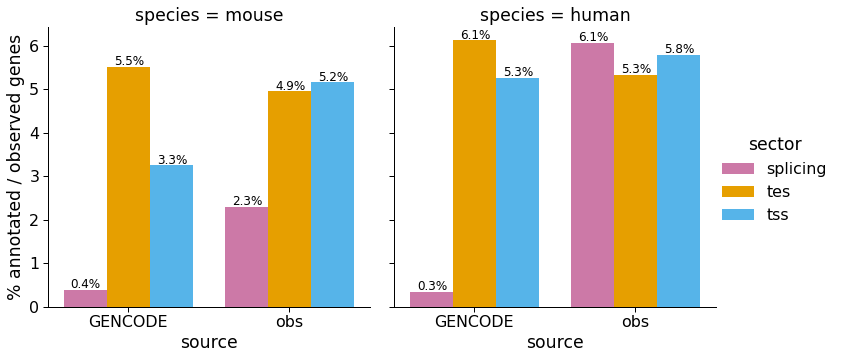

In [6]:
temp = plot_species_sector_gene_counts(m_counts, counts)

In [7]:
df = compare_species(counts, m_counts) 
df[['gid_human', 'sector_human', 'sector_mouse']].groupby(['sector_human', 'sector_mouse']).count().reset_index()
# df.rename({'gid_human': 'n_genes'}, axis=1, inplace=True)

,sector_human,sector_mouse,gid_human
0,simple,simple,8770
1,simple,splicing,302
2,simple,tes,686
3,simple,tss,642
4,splicing,simple,796
5,splicing,splicing,77
6,splicing,tes,63
7,splicing,tss,76
8,tes,simple,602
9,tes,splicing,12
